In [50]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import beta
from root_pandas import read_root
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

In [2]:
df = pd.read_csv('../readout_eff_gen.csv')
df = df.fillna(0.0)

In [3]:
geom_features = ['id', 'zside', 'subdet','layer', 'module', 'x', 'y', 'z', 'tc_layer',
                 'tc_zside', 'tc_subdet', 'tc_id', 'tc_x', 'tc_y', 'tc_z', 'tc_wafer']

df_geom = read_root('../data/test_triggergeom_newmap.root', 'hgcaltriggergeomtester/TreeModules', 
                    columns=geom_features, flatten=geom_features)

df_geom = df_geom.query('zside == 1 and subdet == 3')

In [4]:
wafer_gby = df_geom.groupby('tc_wafer')
wafer_x = wafer_gby.apply(lambda d: d.tc_x.mean())
wafer_y = wafer_gby.apply(lambda d: d.tc_y.mean())
wafer_z = wafer_gby.apply(lambda d: d.tc_z.mean())
wafer_mod = wafer_gby.apply(lambda d: d.module.values[0])
x_map = wafer_x.to_dict()
y_map = wafer_y.to_dict()
z_map = wafer_z.to_dict()
mod_map = wafer_mod.to_dict()
df['wafer_x'] = df.wafer.map(x_map)
df['wafer_y'] = df.wafer.map(y_map)
df['wafer_z'] = df.wafer.map(z_map)
df['wafer_r'] = np.sqrt(df.wafer_x**2 + df.wafer_y**2)
df['wafer_mod'] = df.wafer.map(mod_map)

In [5]:
mod_gby = df_geom.groupby('module')
nwaf = mod_gby.apply(lambda d: len(d.tc_wafer.unique()))
nwaf_map = nwaf.to_dict()
df['nwaf'] = df.wafer_mod.map(nwaf_map)

In [6]:
df_sim = df.query('tc_simenergy > 0.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b1f370550>]], dtype=object)

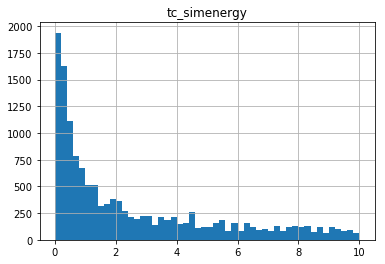

In [7]:
df_sim.hist('tc_simenergy', bins=50, range=[0., 10.])

In [8]:
ebins = np.linspace(0,13,16)
print(ebins)
effList = []
errorlow = []
errorhi = []
xList = []
for i in range(len(ebins) - 1):
    this_df = df_sim.query('{0} < tc_simenergy < {1}'.format(ebins[i], ebins[i+1]))
    n = this_df.isReadout.sum()
    d = float(this_df.shape[0])
    eff = n/d
    effList.append(eff)
    error = [np.abs(eff - beta.ppf(0.16, n, d - n + 1)), np.abs(eff - beta.ppf(0.84, n+1, d - n))]
    errorlow.append(error[0])
    errorhi.append(error[1])
    xList.append(ebins[i] + (ebins[i+1]-ebins[i])/2)
effList = np.array(effList)
errors = [errorlow, errorhi]

[  0.           0.86666667   1.73333333   2.6          3.46666667
   4.33333333   5.2          6.06666667   6.93333333   7.8          8.66666667
   9.53333333  10.4         11.26666667  12.13333333  13.        ]


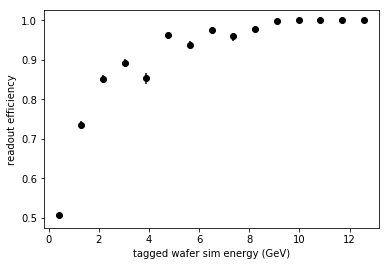

In [9]:
fig, ax = plt.subplots()
ax.errorbar(xList, effList, yerr=errors, linestyle='None', marker='o', color='k')
ax.set_xlabel('tagged wafer sim energy (GeV)')
ax.set_ylabel('readout efficiency')
plt.savefig('eff_vs_simenergy_singleGamma.png', dpi=500)

In [10]:
rbins = np.linspace(df_sim.wafer_r.min(), df_sim.wafer_r.max(), 15)
effList = []
errorlow = []
errorhi = []
xList = []
for i in range(len(rbins) - 1):
    this_df = df_sim.query('{0} < wafer_r < {1}'.format(rbins[i], rbins[i+1]))
    n = this_df.isReadout.sum()
    d = float(this_df.shape[0])
    eff = n/d
    effList.append(eff)
    error = [np.abs(eff - beta.ppf(0.16, n, d - n + 1)), np.abs(eff - beta.ppf(0.84, n+1, d - n))]
    errorlow.append(error[0])
    errorhi.append(error[1])
    xList.append(rbins[i] + (rbins[i+1]-rbins[i])/2)
effList = np.array(effList)
errors = [errorlow, errorhi]

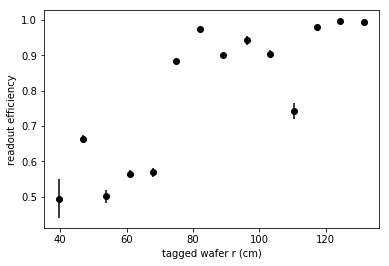

In [11]:
fig, ax = plt.subplots()
ax.errorbar(xList, effList, yerr=errors, linestyle='None', marker='o', color='k')
ax.set_xlabel('tagged wafer r (cm)')
ax.set_ylabel('readout efficiency')
plt.savefig('eff_vs_r_singleGamma.png', dpi=500)

In [12]:
effList = []
errorlow = []
errorhi = []
xList = []
for layer in df_sim.layer.unique():
    this_df = df_sim.query('layer == {0}'.format(layer))
    n = this_df.isReadout.sum()
    d = float(this_df.shape[0])
    eff = n/d
    effList.append(eff)
    error = [np.abs(eff - beta.ppf(0.16, n, d - n + 1)), np.abs(eff - beta.ppf(0.84, n+1, d - n))]
    errorlow.append(error[0])
    errorhi.append(error[1])
    xList.append(layer)
effList = np.array(effList)
errors = [errorlow, errorhi]

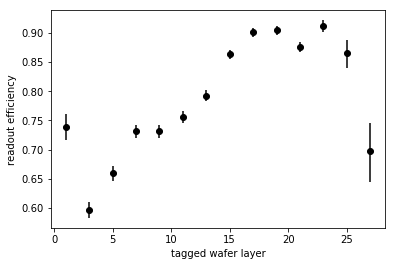

In [13]:
fig, ax = plt.subplots()
ax.errorbar(xList, effList, yerr=errors, linestyle='None', marker='o', color='k')
ax.set_xlabel('tagged wafer layer')
ax.set_ylabel('readout efficiency')
plt.savefig('eff_vs_layer_singleGamma.png', dpi=500)

In [14]:
wafn_bins = df.nwaf.unique()
effList = []
errorlow = []
errorhi = []
xList = []
for nwaf in wafn_bins:
    this_df = df_sim.query('nwaf == {0}'.format(nwaf))
    n = this_df.isReadout.sum()
    d = float(this_df.shape[0])
    eff = n/d
    effList.append(eff)
    #error = np.sqrt(this_eff*(1-this_eff)/this_df.shape[0])
    error = [np.abs(eff - beta.ppf(0.025, n, d - n + 1)), np.abs(eff - beta.ppf(0.975, n+1, d - n))]
    errorlow.append(error[0])
    errorhi.append(error[1])
    xList.append(nwaf)
effList = np.array(effList)
errors = [errorlow, errorhi]

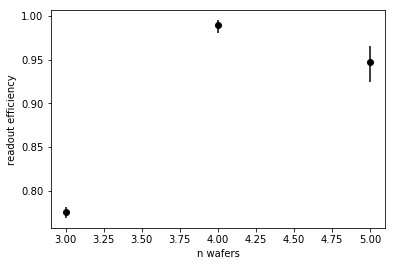

In [15]:
fig, ax = plt.subplots()
ax.errorbar(xList, effList, yerr=errors, linestyle='None', marker='o', color='k')
ax.set_xlabel('n wafers')
ax.set_ylabel('readout efficiency')

In [16]:
df_sim.head()

,gen_energy,isReadout,layer,run,tc_energy,tc_simenergy,wafer,wafer_x,wafer_y,wafer_z,wafer_r,wafer_mod,nwaf
4,[ 143.58937073],False,1,0,0.711280,0.394010,42,14.274492,57.674374,334.818573,59.414598,171,3
19,[ 143.58937073],False,3,0,1.511712,0.095257,22,0.015566,49.465611,334.818573,49.465613,1,3
41,[ 143.58937073],False,3,0,1.500483,2.084604,42,14.274492,57.674374,334.818573,59.414598,171,3
63,[ 143.58937073],False,5,0,2.347434,0.083022,22,0.015566,49.465611,334.818573,49.465613,1,3
74,[ 143.58937073],True,5,0,5.063181,7.619981,42,14.274492,57.674374,334.818573,59.414598,171,3


In [38]:
gen_energies = []
sim_sums = []
tc_sums = []
gby_run = df_sim.groupby('run')
for run in gby_run.groups:
    run_df = gby_run.get_group(run)
    gen_energy = run_df.gen_energy.values[0]
    gen_energy = float(gen_energy[2:-1])
    readout_df = run_df.query('isReadout == True')
    sim_sum = readout_df.tc_simenergy.sum()
    tc_sum = readout_df.tc_energy.sum()
    gen_energies.append(gen_energy)
    sim_sums.append(sim_sum)
    tc_sums.append(tc_sum)
gen_energies = np.array(gen_energies)
sim_sums = np.array(sim_sums)
tc_sums = np.array(tc_sums)
print(len(tc_sums))

1000


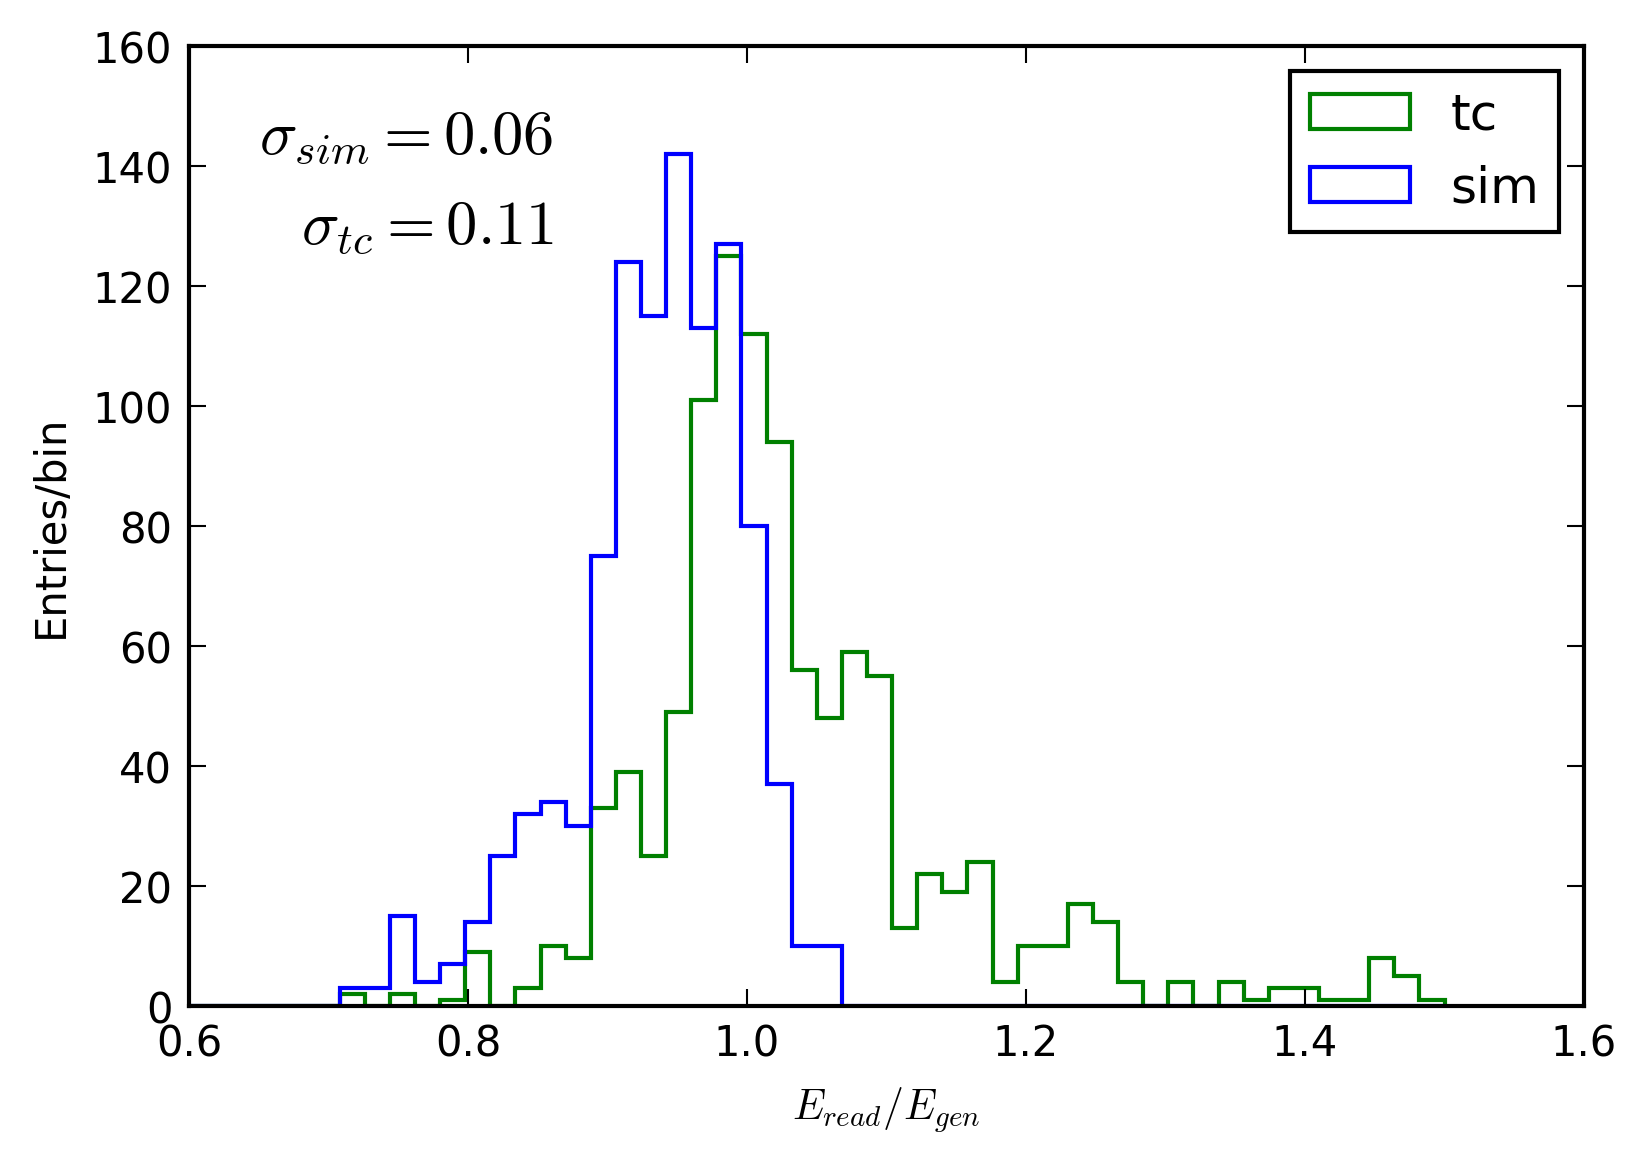

In [63]:
fig, ax = plt.subplots()
res_sim = sim_sums/gen_energies
res_tc = 2*tc_sums/gen_energies
sigma_sim = np.std(res_sim)
sigma_tc = np.std(res_tc)
ax.hist([res_sim, res_tc], bins=50, range=[0.6, 1.5], histtype='step', label=['sim', 'tc'])
#ax.hist(res_tc, bins=50, range=[0.6, 1.5], histtype='step', label='tc')
ax.legend()
ax.set_xlabel(r'$E_{read}/E_{gen}$')
ax.set_ylabel('Entries/bin')
ax.text(0.65, 150, '$\sigma_{{sim}} = {0:.2f}$'.format(sigma_sim), fontsize=15, verticalalignment='top')
ax.text(0.68, 135, '$\sigma_{{tc}} = {0:.2f}$'.format(sigma_tc), fontsize=15, verticalalignment='top')